In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter,OrderedDict
import calendar as cld
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DSV_CSV_Files/melb_data.csv")
# dfInitial= pd.read_csv("/content/drive/MyDrive/DSV_CSV_Files/melb_data.csv")

In [ ]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode           int64
Bedroom2           int64
Bathroom           int64
Car              float64
Landsize           int64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount      int64
dtype: object

In [ ]:
df.shape

(12739, 21)

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [ ]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                25
Landsize            0
BuildingArea     6048
YearBuilt        5023
CouncilArea       528
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,12739.000000,1.273900e+04,12739.000000,12739.000000,12739.000000,12739.000000,12714.000000,12739.000000,6691.000000,7716.000000,12739.000000,12739.000000,12739.000000
mean,2.910511,1.069094e+06,9.911453,3103.997331,2.885862,1.524531,1.589822,551.509852,144.902756,1964.619881,-37.809214,144.994050,7451.544784
std,0.956996,6.405259e+05,5.676656,88.307098,0.967198,0.690485,0.956866,4099.628382,131.387332,37.397960,0.077095,0.100633,4367.352995
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.450000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,166.000000,92.000000,1940.000000,-37.856100,144.929975,4380.000000
50%,3.000000,9.000000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,416.000000,125.000000,1970.000000,-37.802200,144.999200,6567.000000
75%,3.000000,1.325000e+06,12.800000,3147.000000,3.000000,2.000000,2.000000,649.000000,171.000000,1999.250000,-37.757300,145.055500,10331.000000
max,10.000000,9.000000e+06,47.400000,3977.000000,20.000000,8.000000,10.000000,433014.000000,6791.000000,2018.000000,-37.457090,145.526350,21650.000000


In [ ]:
df['CouncilArea'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['CouncilArea']= label_encoder.fit_transform(df['CouncilArea'])

df['CouncilArea'].unique()

array([31, 21, 25,  6, 10, 26,  2, 20,  8, 28, 16,  1, 23, 15,  0, 18, 12,
        3, 11, 33, 13, 17,  5, 19,  9, 24, 29,  7, 14, 32, 30,  4, 27, 22])

In [ ]:
tempSuburb = df["Suburb"]

# dummy encoding
df_encoded = pd.get_dummies(df['Suburb'], prefix='Suburb')
tempSuburb = pd.concat([tempSuburb, df_encoded], axis=1)
tempSuburb

,Suburb,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,...,Suburb_Williams Landing,Suburb_Williamstown,Suburb_Williamstown North,Suburb_Windsor,Suburb_Wollert,Suburb_Wonga Park,Suburb_Wyndham Vale,Suburb_Yallambie,Suburb_Yarra Glen,Suburb_Yarraville
0,Abbotsford,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abbotsford,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abbotsford,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abbotsford,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abbotsford,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12734,Glen Waverley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12735,Glen Waverley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12736,Glenroy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12737,Greensborough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tempSuburb = df["Suburb"]

# One-hot encoding
df_encoded = pd.get_dummies(tempSuburb, prefix='Suburb')
tempSuburb = pd.concat([tempSuburb, df_encoded], axis=1)
tempSuburb

,Suburb,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,...,Suburb_Williams Landing,Suburb_Williamstown,Suburb_Williamstown North,Suburb_Windsor,Suburb_Wollert,Suburb_Wonga Park,Suburb_Wyndham Vale,Suburb_Yallambie,Suburb_Yarra Glen,Suburb_Yarraville
0,Abbotsford,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abbotsford,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abbotsford,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abbotsford,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abbotsford,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12734,Glen Waverley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12735,Glen Waverley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12736,Glenroy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12737,Greensborough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df["Car"] = df["Car"].fillna(2)
df["BuildingArea"] = df["BuildingArea"].fillna(125)
df["YearBuilt"] = df["YearBuilt"].fillna(1970)
df.isnull().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea       0
YearBuilt          0
CouncilArea      528
Lattitude          0
Longtitude         0
Regionname         0
Propertycount      0
dtype: int64

In [ ]:
# Before substituting median values

# Rooms                 0.956996
# Price            640525.934551
# Distance              5.676656
# Postcode             88.307098
# Bedroom2              0.967198
# Bathroom              0.690485
# Car                   0.956866
# Landsize           4099.628382
# BuildingArea        131.387332
# YearBuilt            37.397960
# Lattitude             0.077095
# Longtitude            0.100633
# Propertycount      4367.352995
# dtype: float64

df.std()

Rooms                 0.956996
Price            640525.934551
Distance              5.676656
Postcode             88.307098
Bedroom2              0.967198
Bathroom              0.690485
Car                   0.956099
Landsize           4099.628382
BuildingArea         95.734646
YearBuilt            29.223371
Lattitude             0.077095
Longtitude            0.100633
Propertycount      4367.352995
dtype: float64

In [ ]:
uniValsLen = {}
uniVals = {}
for i in df.keys():

  if(type(df[i][0]) == str):
    uniValsLen[i] = len(df[i].unique())
    uniVals[i] = df[i].unique()

print(uniValsLen)
# {'Suburb': 310, 'Address': 12555, 'Type': 3, 'Method': 5, 'SellerG': 259, 'Date': 55, 'CouncilArea': 34, 'Regionname': 8}

{'Suburb': 310, 'Address': 12555, 'Type': 3, 'Method': 5, 'SellerG': 259, 'Date': 55, 'CouncilArea': 34, 'Regionname': 8}


In [ ]:
keys = ['Type', 'Method', 'Regionname', 'Suburb', 'SellerG', 'Date', 'CouncilArea']
for k in keys:
  tempMap = {}
  for i in range(len(uniVals[k])):
      tempMap[uniVals[k][i]] = i
  df[k] = df[k].map(tempMap)

<Axes: >

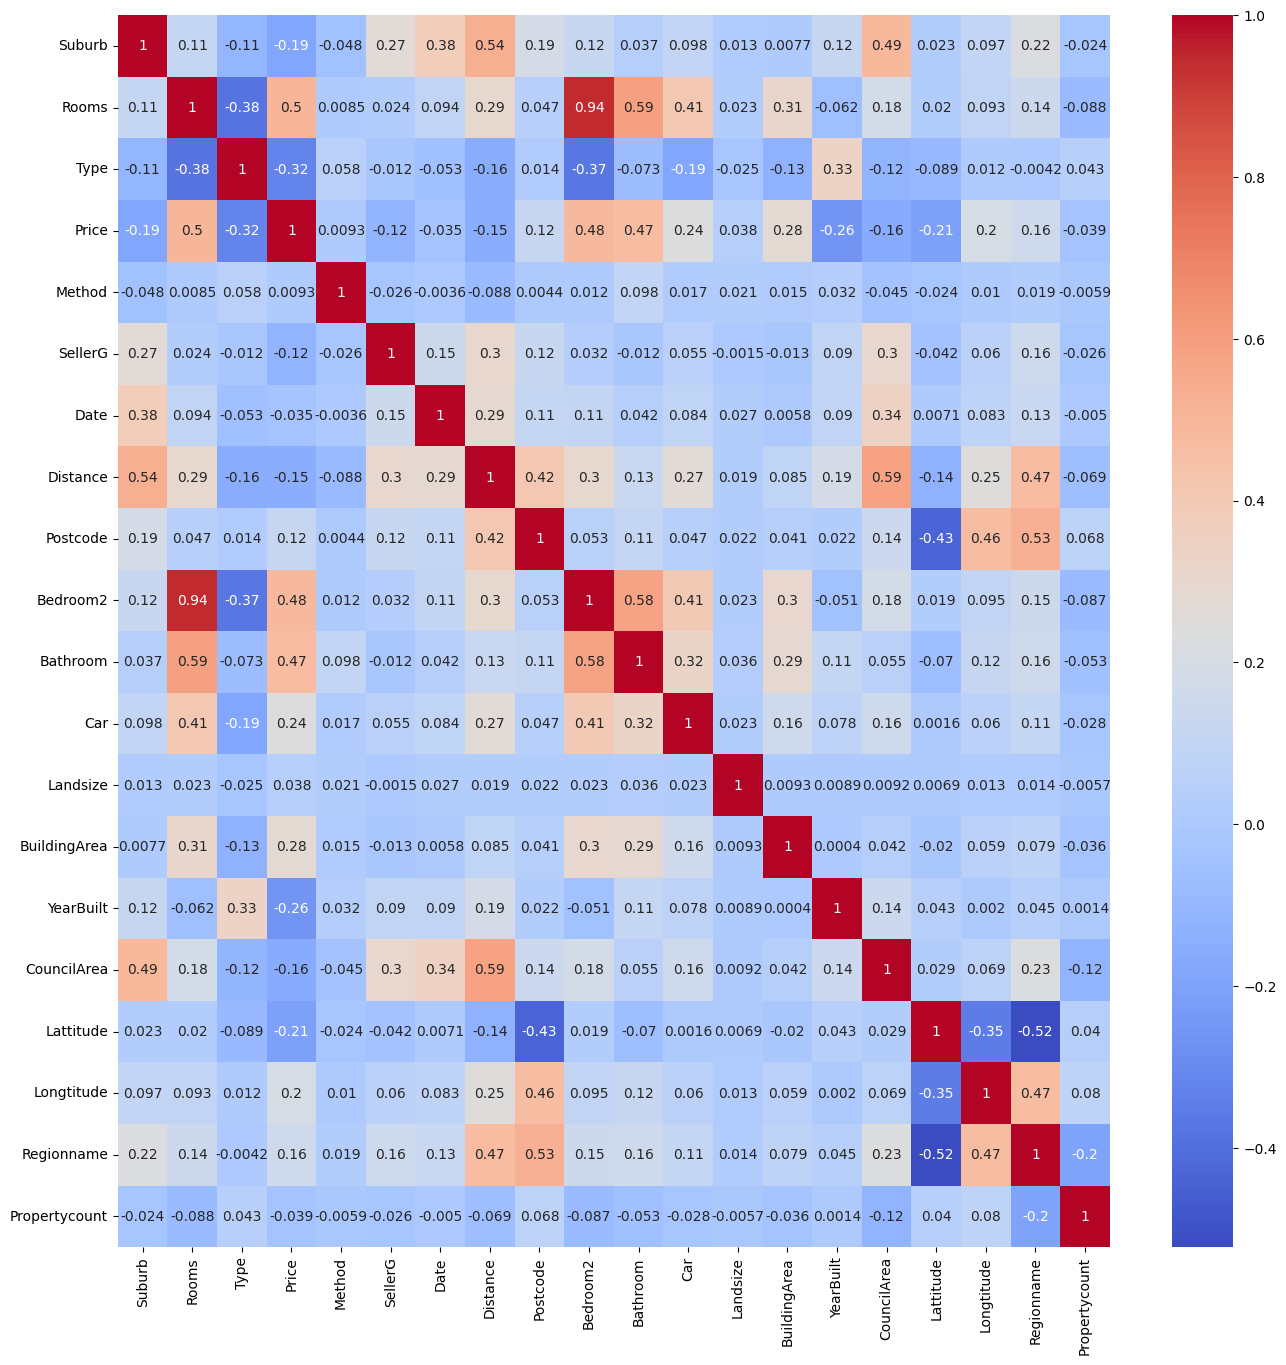

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<Axes: >

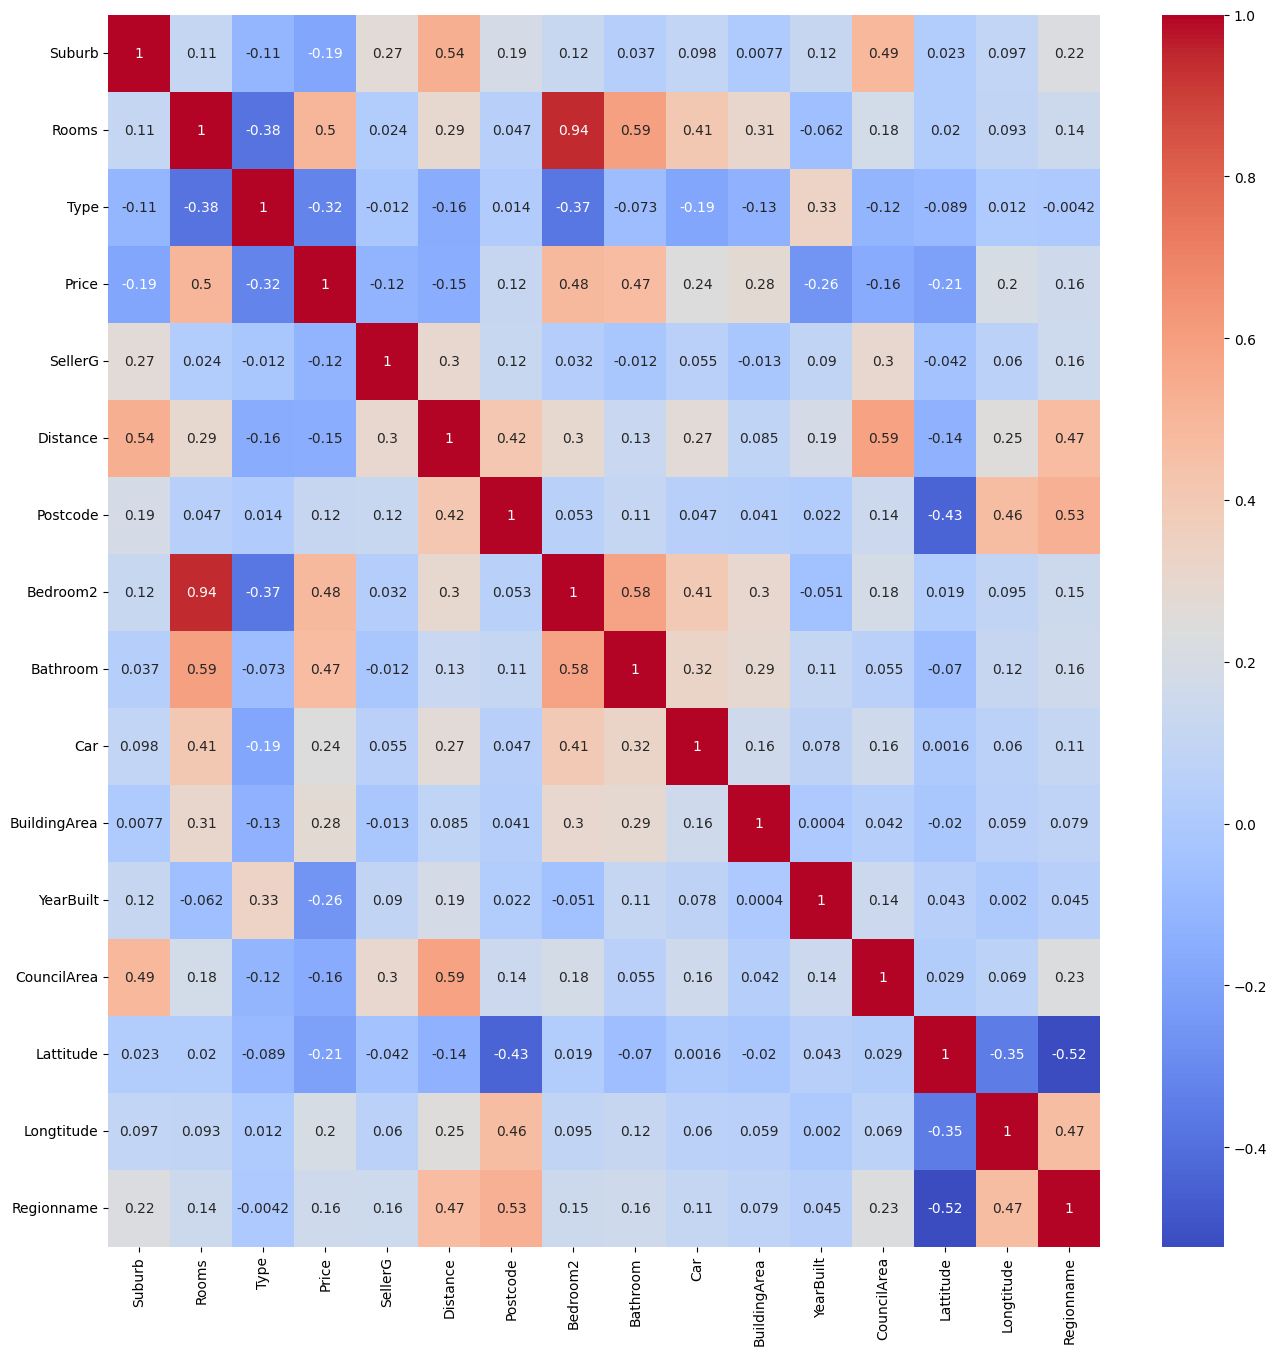

In [ ]:
# "Method", "Propertycount", "Date", "Landsize"
df = df.drop(["Method", "Propertycount", "Date", "Landsize"], axis =1)
correlation_matrix = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='Bedroom2', ylabel='Price'>

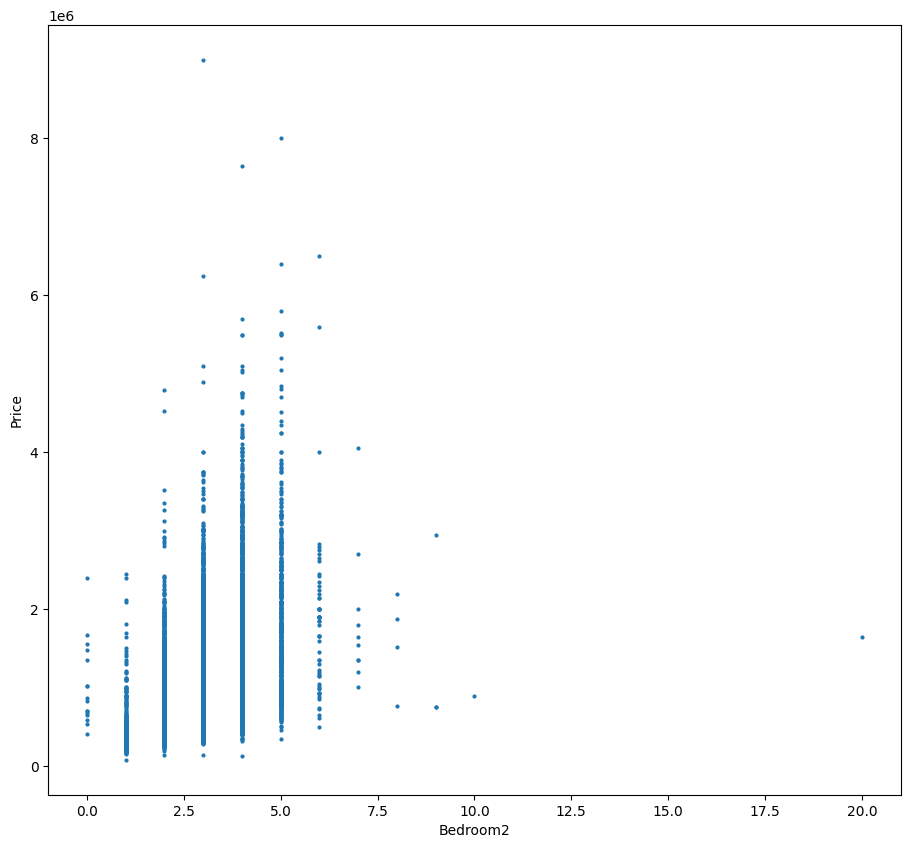

In [ ]:
df.plot.scatter(y="Price", x="Bedroom2", s=4, figsize=(11,10))